In [6]:
import cavendish.utils.Dataloader as dl

In [7]:

import os
from sympy import symbols, Eq, latex
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [8]:
print(os.getcwd())

c:\Users\casey\advanced_exp\FAFO


In [9]:


dfs = dl.load_convert("../Databases/Cavendish-Experiment-PHY64-In-person-data.csv")

MultiIndex([('Measurement 1',      'Time (sec)'),
            ('Measurement 1',   'Position (cm)'),
            ('Measurement 1', 'Uncertainty (m)')],
           )
MultiIndex([('Measurement 2',      'Time (sec)'),
            ('Measurement 2',   'Position (cm)'),
            ('Measurement 2', 'Uncertainty (m)')],
           )
MultiIndex([('Measurement 3',      'Time (sec)'),
            ('Measurement 3',   'Position (cm)'),
            ('Measurement 3', 'Uncertainty (m)')],
           )
MultiIndex([('Measurement 4',      'Time (sec)'),
            ('Measurement 4',   'Position (cm)'),
            ('Measurement 4', 'Uncertainty (m)')],
           )


TypeError: Pos() missing 1 required positional argument: 's'

In [ ]:
display(dfs[0].head())
display(dfs[2].head())

Measurement 1                            
     Time (sec)   Radians Uncertainty (rad)
0             0 -0.007941             0.002
1            20 -0.008940             0.002
2            40 -0.011469             0.002
3            60 -0.014525             0.002
4            80 -0.017933             0.002

Measurement 3                            
     Time (sec)   Radians Uncertainty (rad)
0             0 -0.007294             0.002
1            20 -0.007823             0.002
2            40 -0.009940             0.002
3            60 -0.013350             0.002
4            80 -0.017052             0.002

In [ ]:
dfs[0]['Measurement 1']
time = dfs[0]['Measurement 1','Time (sec)']
radians = dfs[0]['Measurement 1','Radians']
position = dfs[0]['Measurement 1','Radians']
uncertainties = dfs[0]['Measurement 1','Uncertainty (rad)']

In [ ]:
time = np.array(time, dtype=float)
position = np.array(position, dtype=float)
radians = np.array(radians, dtype=float)
theta = 74.66
# time3 = np.array(time3, dtype=float)
# position3 = np.array(position3, dtype=float)


Fitted function: theta0 + amp * np.sin((2*np.pi/period)*time + delta) * np.exp(-b*time)
Guessed parameters: theta0 = -0.015, period = 241.516, amp = -0.007, delta = -1.616, b = 0.001
Fitted function: $\-0.015 + -0.007 \cdot \sin\left(\frac{2\pi}{241.516} t + -1.616\right) \cdot e^{-0.001t}$


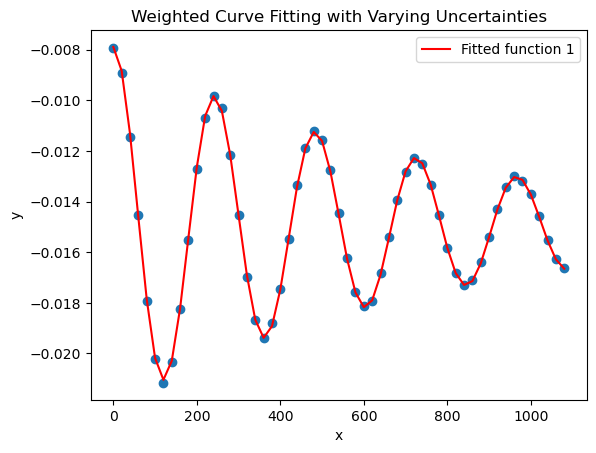

In [ ]:


def damped_oscillation(time, theta0, period,amp,delta, b):
    """
    Function to be fit to the data. operates on a point-wise basis.
    
    Arguments:
    time (_float_): time value
    theta0 (_float_): equilibrium value of theta
    amp (_float_): amplitude of osscilations
    period (_float_):
    delta (_float_): 
    b (_float_)
    """
    return theta0 + amp*np.sin(((2*np.pi)/period)*time+delta)*np.exp(-b*time)


p1, cov1 = curve_fit(damped_oscillation, time, position, p0 = [theta, 240,.095, .01, 0.01])

# p3, cov3 = curve_fit(damped_oscillation, time3, position3, p0 = [theta1, 240,.095, .01, 0.01])



print(f"Fitted function: theta0 + amp * np.sin((2*np.pi/period)*time + delta) * np.exp(-b*time)")
print(f"Guessed parameters: theta0 = {p1[0]:.3f}, period = {p1[1]:.3f}, amp = {p1[2]:.3f}, delta = {p1[3]:.3f}, b = {p1[4]:.3f}")


# Print the fitted function in LaTeX with the fitted parameters
fitted_function_latex = f"$\\{p1[0]:.3f} + {p1[2]:.3f} \\cdot \\sin\\left(\\frac{{2\\pi}}{{{p1[1]:.3f}}} t + {p1[3]:.3f}\\right) \\cdot e^{{-{p1[4]:.3f}t}}$"


print(f"Fitted function: {fitted_function_latex}")



plt.plot(time, damped_oscillation(time, *p1), label='Fitted function 1', color='red')
plt.scatter(time, position)

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Weighted Curve Fitting with Varying Uncertainties')
plt.show()


$\theta = 0.745 + 0.121 \cdot \sin\left(\frac{2\pi}{241.517} t + 1.526\right) \cdot e^{-0.001t}$

Guessed parameters: theta0 = -0.015, period = 241.516, amp = 0.007, delta = 1.526, b = 0.001
Fitted function: $\-0.015 + 0.007 \cdot \sin\left(\frac{2\pi}{241.516} t + 1.526\right) \cdot e^{-0.001t}$


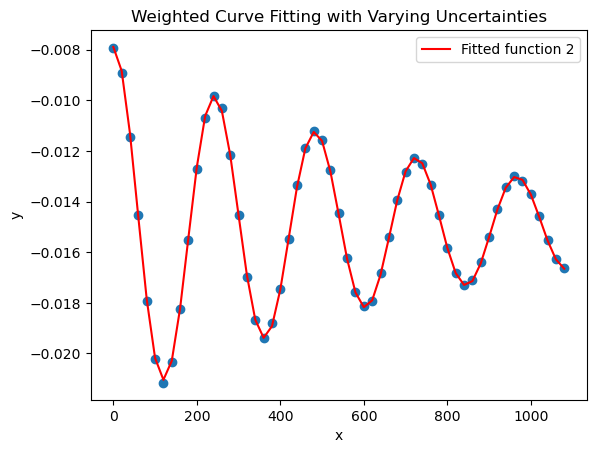

In [ ]:
p2, cov2 = curve_fit(damped_oscillation, time, radians, p0 = [0.001, 240,.095, .01, 0.01])

print(f"Guessed parameters: theta0 = {p2[0]:.3f}, period = {p2[1]:.3f}, amp = {p2[2]:.3f}, delta = {p2[3]:.3f}, b = {p2[4]:.3f}")
fitted_function_latex = f"$\\{p2[0]:.3f} + {p2[2]:.3f} \\cdot \\sin\\left(\\frac{{2\\pi}}{{{p2[1]:.3f}}} t + {p2[3]:.3f}\\right) \\cdot e^{{-{p2[4]:.3f}t}}$"
print(f"Fitted function: {fitted_function_latex}")



plt.plot(time, damped_oscillation(time, *p2), label='Fitted function 2', color='red')
plt.scatter(time, radians)
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Weighted Curve Fitting with Varying Uncertainties')
plt.show()


Fitted function: theta0 + amp * np.sin((2*np.pi/period)*time + delta) * np.exp(-b*time)
Fitted parameters: theta0 = -0.015, period = 241.516, amp = -0.007, delta = -1.616, b = 0.001
ight) \cdot e^{-0.001t}$ $-0.015 + -0.007 \cdot \sin\left(rac{2\pi}{241.516} t + -1.616


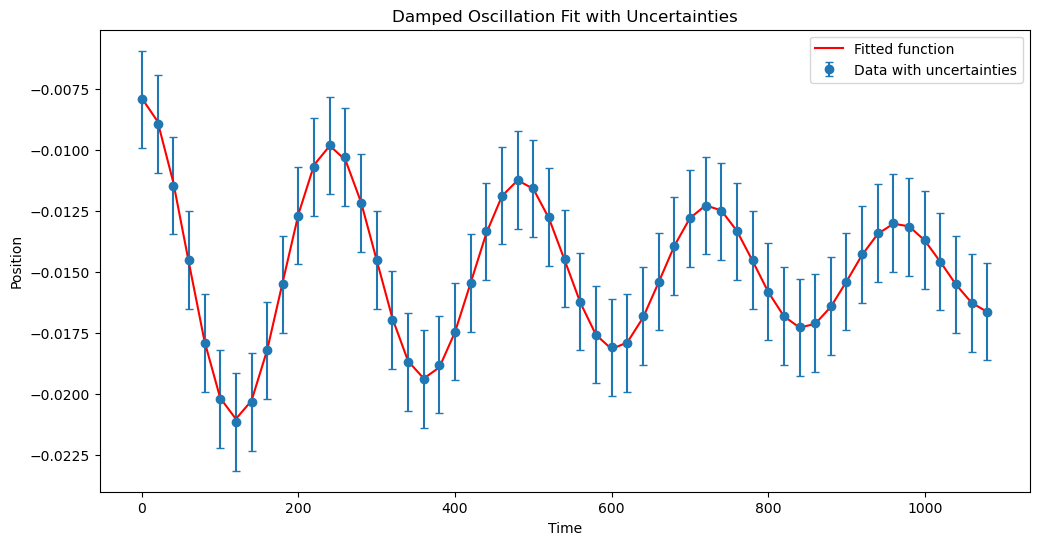

In [ ]:

plt.figure(figsize=(12, 6))
p1, cov1 = curve_fit(damped_oscillation, time, position, sigma=uncertainties, absolute_sigma=True, p0=[theta, 240, 0.095, 0.01, 0.01])

# Print fitted function details
print(f"Fitted function: theta0 + amp * np.sin((2*np.pi/period)*time + delta) * np.exp(-b*time)")
print(f"Fitted parameters: theta0 = {p1[0]:.3f}, period = {p1[1]:.3f}, amp = {p1[2]:.3f}, delta = {p1[3]:.3f}, b = {p1[4]:.3f}")

# Print the fitted function in LaTeX
fitted_function_latex = (f"${p1[0]:.3f} + {p1[2]:.3f} \cdot \sin\left(\frac{{2\pi}}{{{p1[1]:.3f}}} t + {p1[3]:.3f}\right) "
                         f"\cdot e^{{-{p1[4]:.3f}t}}$")
print(f"Fitted function (LaTeX): {fitted_function_latex}")

# Plot the data with error bars
plt.errorbar(time, position, yerr=uncertainties, fmt='o', label='Data with uncertainties', capsize=3)
plt.plot(time, damped_oscillation(time, *p1), label='Fitted function', color='red')

plt.legend()
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Damped Oscillation Fit with Uncertainties')
plt.show()

In [ ]:

plt.figure(figsize=(12, 6))

def damped_oscillation(time, theta0, period, amp, delta, b):
    return theta0 + amp * np.sin(((2 * np.pi) / period) * time + delta) * np.exp(-b * time)


# Fit the curve using uncertainties
p1, cov1 = curve_fit(damped_oscillation, time, position, sigma=uncertainties, absolute_sigma=True, p0=[theta, 240, 0.095, 0.01, 0.01])

# Calculate the uncertainties (standard deviations) of the fitted parameters
param_uncertainties = np.sqrt(np.diag(cov1))

# Print fitted function details
print(f"Fitted function: theta0 + amp * np.sin((2*np.pi/period)*time + delta) * np.exp(-b*time)")
print(f"Fitted parameters:")
print(f"  theta0 = {p1[0]:.5f} ± {param_uncertainties[0]:.5f}")
print(f"  period = {p1[1]:.5f} ± {param_uncertainties[1]:.5f}")
print(f"  amp = {p1[2]:.5f} ± {param_uncertainties[2]:.5f}")
print(f"  delta = {p1[3]:.5f} ± {param_uncertainties[3]:.5f}")
print(f"  b = {p1[4]:.5f} ± {param_uncertainties[4]:.5f}")

# Print the fitted function in LaTeX
fitted_function_latex = (f"${p1[0]:.5f} \pm {param_uncertainties[0]:.5f} + "
                         f"{p1[2]:.5f} \pm {param_uncertainties[2]:.5f} \cdot "
                         f"\sin\left(\frac{{2\pi}}{{{p1[1]:.5f}}} t + {p1[3]:.5f} \pm {param_uncertainties[3]:.5f}\right) "
                         f"\cdot e^{{-{p1[4]:.5f} \pm {param_uncertainties[4]:.5f} t}}$")
print(f"Fitted function (LaTeX): {fitted_function_latex}")

# Plot the data with error bars
plt.errorbar(time, position, yerr=uncertainties, fmt='o', label='Data with uncertainties', capsize=3)
plt.plot(time, damped_oscillation(time, *p1), label='Fitted function', color='red')

plt.legend()
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Damped Oscillation Fit with Uncertainties')
plt.show()


NameError: name 'plt' is not defined